In [1]:
from keras.datasets import imdb
from keras.preprocessing import sequence
import numpy as np

max_features = 10000 #特徴量として考慮する単語数
max_len = 500 #この数の単語を残してテキストをカット
batch_size = 32


# save np.load
np_load_old = np.load

# modify the default parameters of np.load
np.load = lambda *a,**k: np_load_old(*a, allow_pickle=True, **k)

print('Loading data')
# call load_data with allow_pickle implicitly set to true
(input_train, y_train), (input_test, y_test) = imdb.load_data(num_words=max_features)
print(len(input_train), 'train sequences')
print(len(input_test), 'test sequences')

print('Pad sequences (samples x time)')
input_train = sequence.pad_sequences(input_train, maxlen=max_len)
input_test = sequence.pad_sequences(input_test, maxlen=max_len)
print('input_train shape:', input_train.shape)
print('input_test shape:', input_test.shape)
# restore np.load for future normal usage
np.load = np_load_old

Using TensorFlow backend.


Loading data
25000 train sequences
25000 test sequences
Pad sequences (samples x time)
input_train shape: (25000, 500)
input_test shape: (25000, 500)


In [2]:
from keras.models import Sequential
from keras.layers import Embedding, LSTM, Dense

model = Sequential()
model.add(Embedding(max_features, 32))
model.add(LSTM(32))
model.add(Dense(1, activation='sigmoid'))

model.compile(optimizer='rmsprop',
             loss='binary_crossentropy',
             metrics=['acc'])

history = model.fit(input_train, y_train,
                   epochs=10, batch_size=128, validation_split=0.2)






Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where

Train on 20000 samples, validate on 5000 samples
Epoch 1/10
20000/20000 [==============================] - 96s 5ms/step - loss: 0.5183 - acc: 0.7581 - val_loss: 0.3940 - val_acc: 0.8286
Epoch 2/10
20000/20000 [==============================] - 142s 7ms/step - loss: 0.3027 - acc: 0.8818 - val_loss: 0.3342 - val_acc: 0.8528
Epoch 3/10
20000/20000 [==============================] - 145s 7ms/step - loss: 0.2414 - acc: 0.9086 - val_loss: 0.3290 - val_acc: 0.8564
Epoch 4/10
20000/20000 [==============================] - 155s 8ms/step - loss: 0.2036 - acc: 0.9248 - val_loss: 0.3087 - val_acc: 0.8628
Epoch 5/10
20000/20000 [==============================] - 186s 9ms/step - loss: 0.1807 - acc: 0.9339 - val_loss: 0.2891 - val_acc: 0.8866
Epoch 6/10
20000/20000 [==============================] - 189s 9ms/step - loss: 0.1615 - acc: 0.9415 - val_loss: 0.3141 - val_acc: 0.8684
Epoch 7/10
20000/20000 [

findfont: Font family ['IPAexGothic'] not found. Falling back to DejaVu Sans.
findfont: Font family ['IPAexGothic'] not found. Falling back to DejaVu Sans.


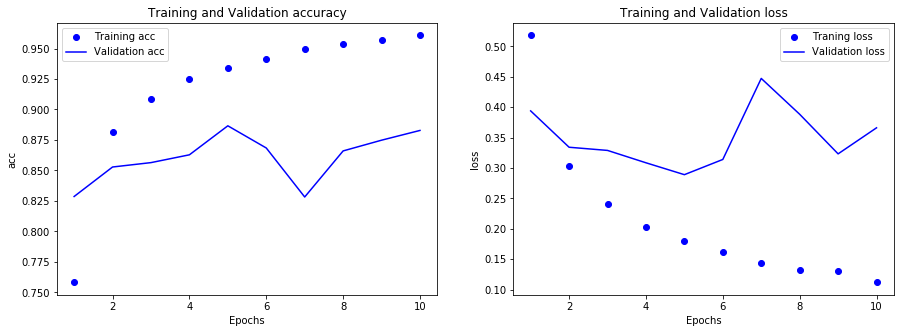

In [4]:
import matplotlib.pyplot as plt

"""可視化"""

acc = history.history['acc']
val_acc = history.history['val_acc']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(1, len(acc) + 1)

fig = plt.figure(figsize=(15, 5))

fig.add_subplot(1, 2, 1)
plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and Validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('acc')
plt.legend()

fig.add_subplot(1, 2, 2)
plt.plot(epochs, loss, 'bo', label='Traning loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and Validation loss')
plt.xlabel('Epochs')
plt.ylabel('loss')
plt.legend()

plt.show()